In [30]:
# Importing the necessary tools
# General 
import pandas as pd
import numpy as np

In [31]:
cheese_df = pd.read_csv("/home/ec2-user/SageMaker/cheese_names_WEBSCRAPED.csv")

In [32]:
cheese_df.head()

,Unnamed: 0,Made from,Country of origin,Region,Type,Family,Fat content,Texture,Rind,Colour,Flavour,Aroma,Vegetarian,Producers
0,Abbaye de Belloc,unpasteurized sheep's milk,France,Pays Basque,"semi-hard, artisan",NaN,NaN,"creamy, dense and firm",natural,yellow,burnt caramel,lanoline,yes,NaN
1,Abbaye de Belval,cow's milk,France,NaN,semi-hard,NaN,40-46%,elastic,washed,ivory,NaN,aromatic,no,NaN
2,Abbaye de Citeaux,unpasteurized cow's milk,France,Burgundy,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense and smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",no,NaN
3,Abbaye de Tamie,unpasteurized cow's milk,France,Savoie,"soft, artisan",NaN,NaN,"creamy, open and smooth",washed,white,"fruity, nutty","lactic, perfumed, pungent",no,NaN
4,Abbaye de Timadeuc,pasteurized cow's milk,France,province of Brittany,semi-hard,NaN,NaN,soft,washed,pale yellow,NaN,NaN,no,Abbaye Cistercienne NOTRE-DAME DE TIMADEUC


In [33]:
cheese_df.dtypes

Unnamed: 0           object
Made from            object
Country of origin    object
Region               object
Type                 object
Family               object
Fat content          object
Texture              object
Rind                 object
Colour               object
Flavour              object
Aroma                object
Vegetarian           object
Producers            object
dtype: object

In [34]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [35]:
labelencoder=LabelEncoder() #encode all values in numbers
for column in cheese_df.columns:
    cheese_df[column] = labelencoder.fit_transform(cheese_df[column])

In [36]:
cheese_df.head(10)

,Unnamed: 0,Made from,Country of origin,Region,Type,Family,Fat content,Texture,Rind,Colour,Flavour,Aroma,Vegetarian,Producers
0,2,66,44,390,45,22,136,171,7,16,97,284,1,404
1,3,10,44,557,44,22,90,324,10,8,851,0,0,404
2,4,58,44,93,62,22,136,173,10,15,57,60,0,404
3,5,58,44,453,75,22,136,218,10,15,503,279,0,404
4,6,29,44,10,44,22,136,392,10,11,851,381,0,7
5,7,29,44,358,62,22,108,389,10,11,698,157,0,8
6,8,29,40,367,44,4,136,159,7,11,693,0,1,386
7,9,55,32,262,27,22,97,339,7,11,78,381,0,404
8,10,58,44,235,45,21,103,220,7,11,9,320,0,404
9,11,19,99,102,100,22,136,404,12,17,121,178,0,404


In [37]:
# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

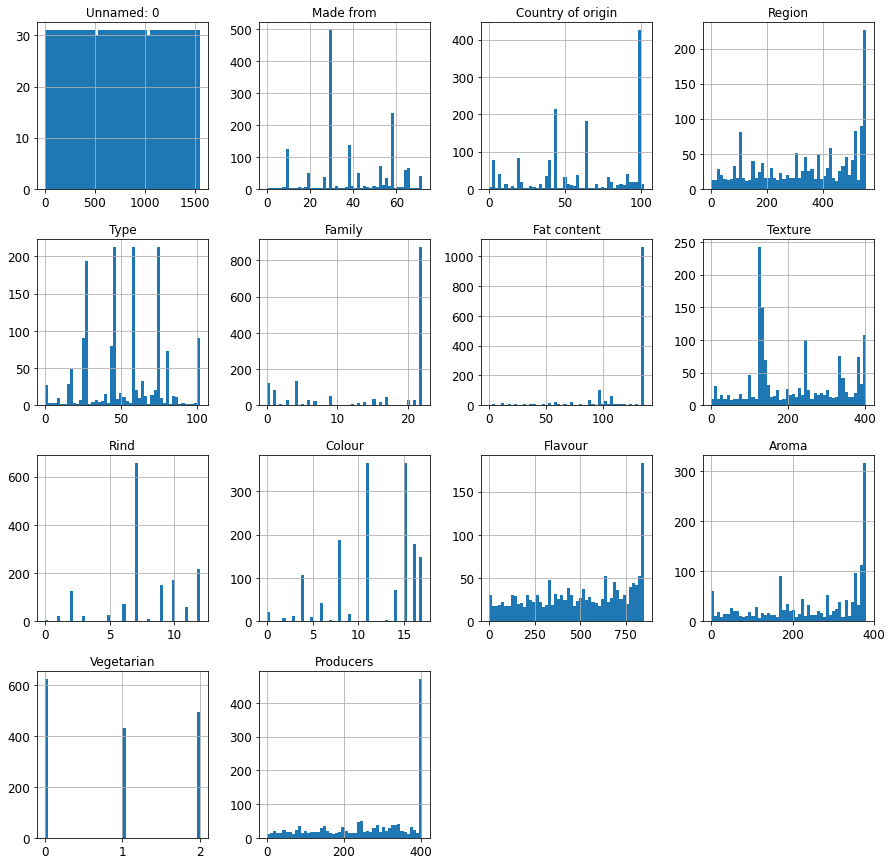

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
cheese_df.hist(bins=50, figsize=(15,15))
plt.show()

In [39]:
cheese_df.drop(cheese_df.index[cheese_df['Vegetarian'] == 2], inplace=True) #remove all missing vegetarian categories

In [40]:
cheese_df['Vegetarian'].value_counts() #shows value counts for vegetarian, 1 means it IS vegetarian, 0 means it is NOT veg.

0    622
1    432
Name: Vegetarian, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Vegetarian/Non-Vegetarian cheeses')

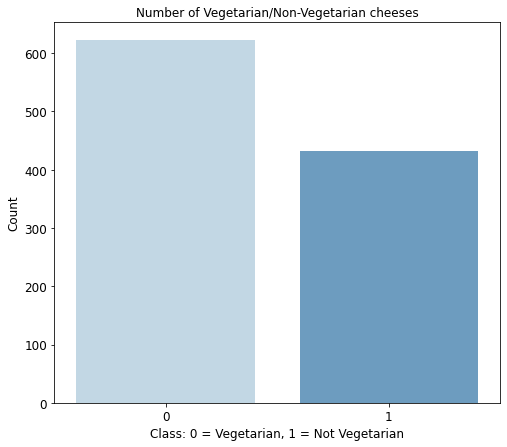

In [41]:
import seaborn as sns

count = cheese_df['Vegetarian'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="Blues")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class: 0 = Vegetarian, 1 = Not Vegetarian', fontsize=12)
plt.title('Number of Vegetarian/Non-Vegetarian cheeses')

In [42]:
cheese_df.drop(['Unnamed: 0'], axis=1, inplace = True) #remove the cheese name, this is irrelevant

In [43]:
cheese_df

,Made from,Country of origin,Region,Type,Family,Fat content,Texture,Rind,Colour,Flavour,Aroma,Vegetarian,Producers
0,66,44,390,45,22,136,171,7,16,97,284,1,404
1,10,44,557,44,22,90,324,10,8,851,0,0,404
2,58,44,93,62,22,136,173,10,15,57,60,0,404
3,58,44,453,75,22,136,218,10,15,503,279,0,404
4,29,44,10,44,22,136,392,10,11,851,381,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,29,99,415,100,22,136,203,1,15,292,188,0,283
1544,64,44,466,87,0,97,339,1,0,767,318,1,404
1545,29,91,201,75,22,97,389,7,11,85,333,0,404
1546,55,0,557,26,22,136,404,12,17,851,381,0,404


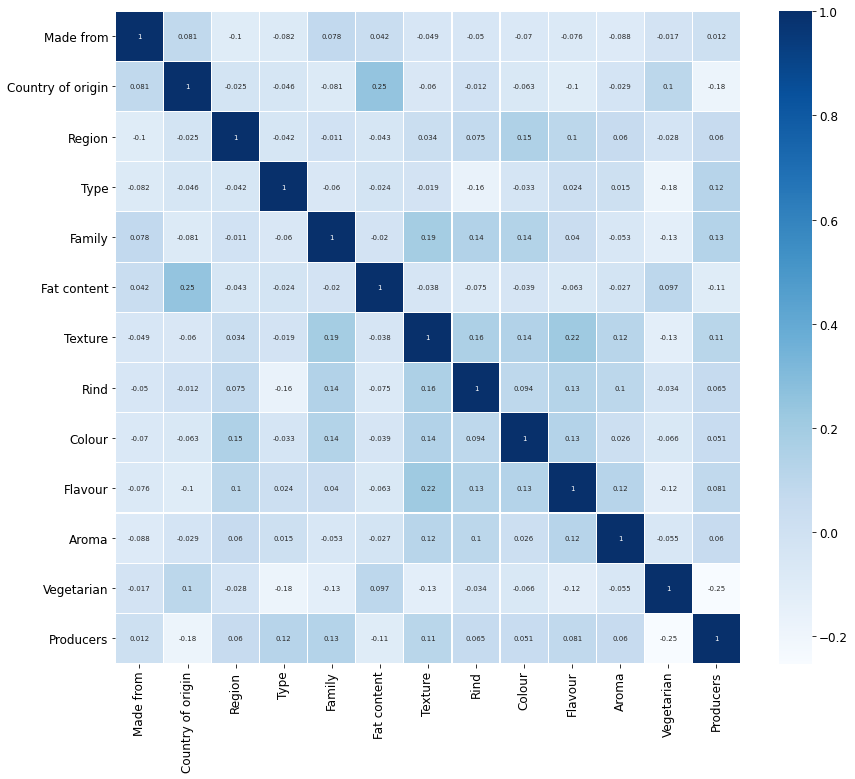

In [45]:
plt.figure(figsize=(14,12))
sns.heatmap(cheese_df.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
y = cheese_df["Vegetarian"].values # y is "class" column as numpy array. This represents the "ground truth"
x = cheese_df.drop(["Vegetarian"], axis=1).values # x is all data except "class" column. Representing all of the features

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2) # Split data for train and test.

In [48]:
X = x_train #shortened variables which will be used for all training
y = y_train

In [49]:
assert len(x_train) == len(y_train) #training data with and without class are equal

In [50]:
len(y_train)

843

In [51]:
len(y_test) # good split

211

In [52]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [53]:
clf = svm.SVC()
clf.fit(X, y) #fit to training data

SVC()

In [55]:
predicted_svc = clf.predict(x_test)
accuracy_score(y_test, predicted_svc) #64% chance it accurately predicts

0.6398104265402843

In [56]:
from sklearn.neighbors import KNeighborsClassifier # import for classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X,y)
predicted_knn = clf_knn.predict(x_test)
accuracy_score(y_test, predicted_knn)

0.6161137440758294

In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
nb.score(x_test,y_test)

0.6540284360189573

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X, y)
predicted_dt = clf_dt.predict(x_test)
accuracy_score(y_test, predicted_dt)

0.6966824644549763

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_v = RandomForestClassifier()
rf_v.fit(X, y)
predicted_rf_v = rf_v.predict(x_test)
accuracy_score(y_test, predicted_rf_v)

0.8009478672985783

In [62]:
from sklearn.model_selection import cross_val_score

In [65]:
cross_val_10 = cross_val_score(rf_v, X, y, cv=10)
cross_val_10
cross_val_10.mean()

0.7568067226890757

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_rf_v) 

array([[97, 19],
       [23, 72]])

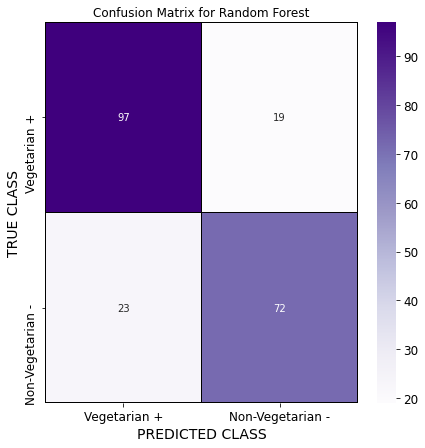

In [68]:
cm = confusion_matrix(y_test, predicted_rf_v)
x_axis_labels = ["Vegetarian +", "Non-Vegetarian -"]
y_axis_labels = ["Vegetarian +", "Non-Vegetarian -"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.title('Confusion Matrix for Random Forest')
plt.show()